In [2]:
# Import the necessary Packages and Libraries.
# Some are used for training and some of them are used for analysis
import pandas as pd
# Import keras
from keras.models import Sequential
from keras.layers import Dense
# Using scikit-learn library
from sklearn.model_selection import train_test_split
# Using Matplotlib for plotting
import matplotlib.pyplot as plt
# Using seaborn for analysis purpose
import seaborn as sns
# Using numpy for Efficiently handle arrays
import numpy as np

In [4]:
# Load the data set(housepricedata)

# Load it using pandas

data = pd.read_csv('housepricedata.csv')

In [5]:
# Display some data to check whether the data set is loaded correctly.

data.head(7)

# It display top 7 rows.

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1


In [6]:
# Convert the data into an array

array_data = np.array(data)
print(array_data.shape)
array_data

(1460, 11)


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
# Splitting the data set into X & Y where X = (:,0:10) & Y = (:,10)
x = array_data[:,0:10]
y = array_data[:,10]
print(x.shape)
print(y.shape)

(1460, 10)
(1460,)


In [8]:
# Use the min-max scaler method  to scales the dataset so that all the input features lie between 0 and 1 inclusive

## Start code here
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)
print(x)
## End code here

[[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


In [9]:
# Split the data into 80% training and 20% (testing (10%) and validation (10%)) and print it to see the difference.

# splitting the data to train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 123)

# splitting the testing data into test and validation(test data is agian dividing into test and validation)

x_test10, x_vali10, y_test10, y_vali10 = train_test_split(x_test, y_test, test_size=0.5, random_state = 123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print("20% is split into test and validation split")
print(x_test10.shape)
print(x_vali10.shape)
print(y_test10.shape)
print(y_vali10.shape)

(1168, 10)
(292, 10)
(1168,)
(292,)
20% is split into test and validation split
(146, 10)
(146, 10)
(146,)
(146,)


In [10]:
# Build the model and architecture upon the deep neural network

# Start code here
from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.keras.optimizers import SGD

# The models architechture 4 layers, 3 with 32 neurons and activation function = relu function,
# the last layer has 1 neuron with an activation function = sigmoid function which returns a value btwn 0 and 1
# The input shape/ input_dim = 10 the number of features in the data set
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# End code

In [11]:
# loss measuers how well the model did on training , and then tries to improve on it using the optimizer
# sgd = SGD
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model

train_model = model.fit(x_train, y_train, epochs=200, validation_data=(x_vali10, y_vali10))

Epoch 1/200
37/37 [==============================] - 2s 10ms/step - loss: 0.6993 - accuracy: 0.5051 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 2/200
37/37 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4966 - val_loss: 0.6935 - val_accuracy: 0.4658
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5454 - val_loss: 0.6903 - val_accuracy: 0.5753
Epoch 4/200
37/37 [==============================] - 1s 16ms/step - loss: 0.6879 - accuracy: 0.6533 - val_loss: 0.6875 - val_accuracy: 0.6986
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6978 - val_loss: 0.6850 - val_accuracy: 0.7123
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.6764 - val_loss: 0.6823 - val_accuracy: 0.7123
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.7021 - val_loss: 0.6796 - val_accuracy: 0.7740
Epoch 8/200

In [13]:
# Evaluate the model
# We pass two input variables to evaluate our model

model.evaluate(x_train, y_train)

37/37 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8981


[0.23671743273735046, 0.898116409778595]

In [14]:
# Make a prediction

y_pred10 = model.predict(x_test10)

5/5 [==============================] - 0s 2ms/step


In [15]:
# Q. Make a prediction

y_vali10 = model.predict(x_vali10)

5/5 [==============================] - 0s 5ms/step


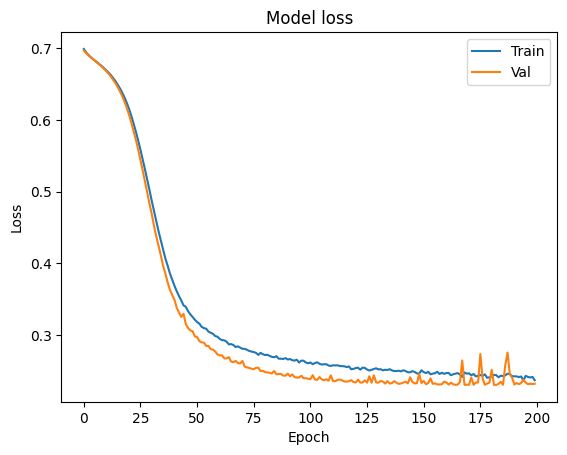

In [16]:
# visualize the training loss and the validation loss to see if the model is overfitting

plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

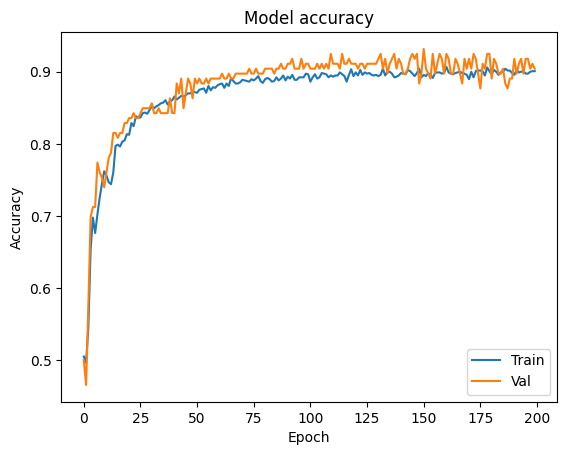

In [17]:
# visualize the training accuracy and the validation accuracy to see if the model is overfitting

plt.plot(train_model.history["accuracy"])
plt.plot(train_model.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
#Conclusion : Models at 90% accuracy has a very light flucations with train and validation data.